# Descripcion del problema


Informacion relevante:

   Los datos están relacionados con las campañas de marketing  de una institución bancaria portuguesa.
   Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto para el mismo cliente,
   con el fin de acceder a un credito bancario  y si esta o no interesado 
   
   Informacion sobre el conjunto de datos 
   
   El conjuto de datos original contiene 41.189  registros y 20 atributos + la clase obejetivo con dos categoria si o no 
  
    

## Preparacion de datos
importamos todas las librerías necesarias para trabajar Aprendizaje Automático con Python y Sci-kit learn

In [39]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
import io
import requests
from sklearn.metrics import classification_report, confusion_matrix

##### 1) bank-full.csv contiene (41.189) instancias y 21 atributos , ordenados por fecha (desde mayo de 2008 hasta noviembre de 2010).

In [41]:
ds_ = pd.read_csv('bank-additional-full.csv', sep=';', na_values=" ?" )# se carga el cojunto de datos csv
ds = ds_.dropna() # se elimina las filas/columnas con valores null
ds = ds.rename(columns = {ds.columns.values[20]:'C'}) # renombramos la ultima columna por "C" de clase
le = preprocessing.LabelEncoder() # Label encoder de sci-kit
ds = ds.apply(le.fit_transform) # Convertimos los valores de object a numericos
ds.head() # se verifica el resultado de cargue de los datos 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,C
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0


In [8]:
ds.C.value_counts()

0    36548
1     4640
Name: C, dtype: int64

### Balanceo de clases en conjunto de datos con undersampling

In [42]:
from sklearn.utils import resample
# separar las clases entre mayoritaria y minoritaria 
ds_majority = ds[ds.C ==0]
ds_minorityd = ds[ds.C ==1]

# sobre muestrear las clases minoritarias
ds_majority_downsampled = resample(ds_majority, 
                                 replace=False,     # Muestreo sin remplaso
                                 n_samples=4640,    # cantidad de muestra a igualar
                                 random_state=123) 



# concaternar la clase mayoritaria con la clases minoritarias creadas recientemente
ds_downsampled = pd.concat([ds_majority_downsampled,ds_minorityd ])
 
# imprimir el numero de muestras por clase
ds_downsampled.C.value_counts()

1    4640
0    4640
Name: C, dtype: int64

## Dividir el conjunto de datos 
Dividir aleatoriamente el conjunto de datos cargado y normalizado en anterior paso en "ds"  70% para train y 30% para test,
adicionalmente se extraera 10% de los datos de train para crear el conjunto de validadcion 

In [43]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_val_score


ds=ds_downsampled
import numpy as np

from sklearn.model_selection import train_test_split
x=ds.drop('C', axis = 1)
y=ds['C']
from collections import Counter
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)
x_strainval, x_stestval, y_strainval,y_stestval = train_test_split(x_train,y_train, test_size = 0.1, random_state=1)
#x_train, x_test, y_train, y_test = cross_validation.train_test_spli(x, y, test_size = 0.3, random_state=1)
#x_strainval, x_stestval, y_strainval,y_stestval = cross_validation.train_test_spli(x_train,y_train, test_size = 0.1, random_state=1)

print('Conteo de clases conjunto train {}'.format(Counter(y_train)))
print('Conteo de Clases conjunto test  {}'.format(Counter(y_test)))
print('Conteo de Clases conjunto train Validacion  {}'.format(Counter( y_strainval)))
print('Conteo de Clases conjunto test Validacion   {}'.format(Counter( y_stestval)))



Conteo de clases conjunto train Counter({1: 3249, 0: 3247})
Conteo de Clases conjunto test  Counter({0: 1393, 1: 1391})
Conteo de Clases conjunto train Validacion  Counter({0: 2930, 1: 2916})
Conteo de Clases conjunto test Validacion   Counter({1: 333, 0: 317})


In [44]:
#se crean dos dataframe df=train dt=test
df=pd.DataFrame(x_train)
df['C']=y_train
dt=pd.DataFrame(x_test)
dt['C']=y_test


Se realiza un histograma para conocer la distribucion y proporcion de las clases

Clase 0: 4640
Clase 1: 4640
Proporcion: 1.0 : clase[0] / clase[1]


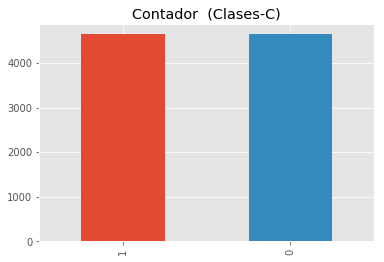

In [45]:
target_count =ds['C'].value_counts() 
print('Clase 0:', target_count[0])
print('Clase 1:', target_count[1])
print('Proporcion:', round(target_count[0] / target_count[1]  , 2), ': clase[0] / clase[1]')
target_count.plot(kind='bar', title='Contador  (Clases-C)');

Reducción de datos: dimensionalidad, numerosidad, datos.
compresión, para esto se realiza una matriz de correlacion. 

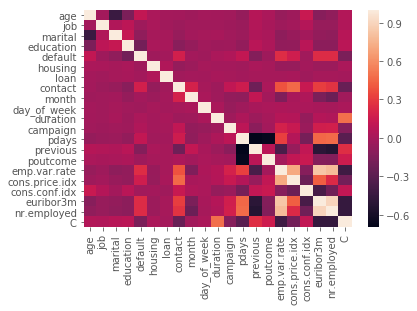

In [102]:
import seaborn as sns 
corr = ds.corr() 
sns.heatmap(corr, 
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values) 

In [46]:
#%reset
#del df['duration']
#del df['previous']
#del dt['contact']
#del dt['duration']

#df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,C
24132,38,1,0,0,0,0,0,0,7,1,0,26,0,1,7,11,7,271,9,0
21988,18,9,2,6,0,2,0,0,1,4,0,26,0,1,9,13,17,308,10,0
40191,5,0,2,6,0,2,0,1,3,1,0,26,2,0,4,22,11,117,1,1
4418,20,7,2,3,0,2,0,1,6,3,8,26,0,1,8,18,16,286,8,0
10865,18,9,1,5,0,0,0,1,4,4,1,26,0,1,9,23,8,306,10,1


se puede observa que existe una alta  correlacion evidente entre los atributos "pdays, previous", aunque por ahora 
no se tomara deciciones al respecto hasta no realizar las primeros experimento  con los modelos.

# Tecnica de Clasificacion # 1 (SVM)

Se realizaran algunas pruebas para estimar cuales parametros permiten el mejor desempeño de la SVM, debido al alto costo 
computacional la evaluacion de dichos parametros se ralizara con conjunto de validacion .



### ******Iteracion 1.1 SVM Lineal********
##### Conjunto de datos 6.496  instancias 21 atributos
train = (clase (1) : 3249, clase (0) : 3247),
test = (clase (0): 1393, clase (1): 1391)


In [47]:
########################################################################
#################### Linear SVM FINAL ##################################
xntrain =df.drop('C', axis = 1)
yntrain = df['C']
xntest =dt.drop('C', axis = 1)
yntest = dt['C']

SVM = svm.LinearSVC(dual=False, C=10.0)
SVM.fit(xntrain, yntrain)

from sklearn.metrics import classification_report, confusion_matrix

SVM_predict = SVM.predict(xntest)

print("\n############## Accuracy Linear SVM FINAL ##################")
print(metrics.accuracy_score(yntest, SVM_predict))
print(metrics.confusion_matrix(yntest, SVM_predict))
print(classification_report(yntest,SVM_predict))
xntest.head()


############## Accuracy Linear SVM FINAL ##################
0.7320402298850575
[[1111  282]
 [ 464  927]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1393
           1       0.77      0.67      0.71      1391

   micro avg       0.73      0.73      0.73      2784
   macro avg       0.74      0.73      0.73      2784
weighted avg       0.74      0.73      0.73      2784



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
17871,21,10,1,0,1,0,0,0,3,3,0,26,0,1,9,17,6,305,10
37859,27,4,1,7,0,2,0,0,1,0,1,26,0,1,2,0,22,102,5
5948,28,7,0,7,0,2,0,1,6,3,4,26,0,1,8,18,16,287,8
30586,23,0,1,6,0,0,0,0,6,1,3,26,0,1,3,8,4,215,6
39913,18,9,0,5,0,0,0,0,4,4,0,13,2,0,4,20,13,66,1


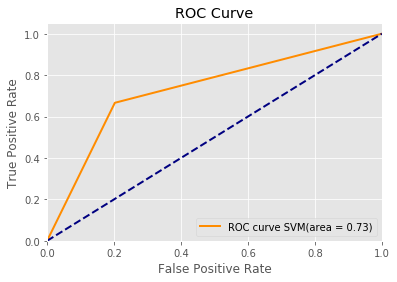

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fpr, tpr, _ = roc_curve(yntest, SVM_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve SVM(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Tecnica de Clasificacion # 2 (K-Vecinos mas cercanos)


### ******Iteracion 2 K-NN********

Conjunto de datos 6.496  instancias 21 atributos
train = (clase (1) : 3249, clase (0) : 3247),
test = (clase (0): 1393, clase (1): 1391)


In [49]:
################################################################
##################  K-Vecinos más cercanos #####################
################################################################
xntrain =df.drop('C', axis = 1)
yntrain = df['C']
xntest =dt.drop('C', axis = 1)
yntest = dt['C']
n_neighbors = 20
KNN = KNeighborsClassifier(n_neighbors)
KNN.fit(xntrain, yntrain)
KNN_predict = KNN.predict(xntest)

print("\n############## Accuracy KNN ##################")
print(metrics.accuracy_score(yntest, KNN_predict))
print(metrics.confusion_matrix(yntest, KNN_predict))
print(classification_report(yntest,KNN_predict))
xntest.head()


############## Accuracy KNN ##################
0.7406609195402298
[[1213  180]
 [ 542  849]]
              precision    recall  f1-score   support

           0       0.69      0.87      0.77      1393
           1       0.83      0.61      0.70      1391

   micro avg       0.74      0.74      0.74      2784
   macro avg       0.76      0.74      0.74      2784
weighted avg       0.76      0.74      0.74      2784



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
17871,21,10,1,0,1,0,0,0,3,3,0,26,0,1,9,17,6,305,10
37859,27,4,1,7,0,2,0,0,1,0,1,26,0,1,2,0,22,102,5
5948,28,7,0,7,0,2,0,1,6,3,4,26,0,1,8,18,16,287,8
30586,23,0,1,6,0,0,0,0,6,1,3,26,0,1,3,8,4,215,6
39913,18,9,0,5,0,0,0,0,4,4,0,13,2,0,4,20,13,66,1


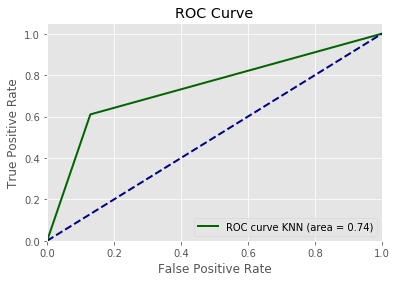

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fpr, tpr, _ = roc_curve(yntest, KNN_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkgreen',
         lw=2, label='ROC curve KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### ******Iteracion 3.1 Redes Neuronales MLP********


CConjunto de datos 6.496  instancias 21 atributos
train = (clase (1) : 3249, clase (0) : 3247),
test = (clase (0): 1393, clase (1): 1391)


In [52]:
xntrain =df.drop('C', axis = 1)
yntrain = df['C']
xntest =dt.drop('C', axis = 1)
yntest = dt['C']

from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(hidden_layer_sizes=(16,16,16,16,16,16,16,16), activation='relu',
                    random_state=42, learning_rate_init=0.0016)

clf.fit(xntrain, yntrain)

clf_predict2 = clf.predict(xntest)

print("\n############## Accuracy MLP ##################")
print(metrics.accuracy_score(yntest, clf_predict2))
print(metrics.confusion_matrix(yntest, clf_predict2))
print(classification_report(yntest, clf_predict2))



############## Accuracy MLP ##################
0.7377873563218391
[[1158  235]
 [ 495  896]]
              precision    recall  f1-score   support

           0       0.70      0.83      0.76      1393
           1       0.79      0.64      0.71      1391

   micro avg       0.74      0.74      0.74      2784
   macro avg       0.75      0.74      0.74      2784
weighted avg       0.75      0.74      0.74      2784



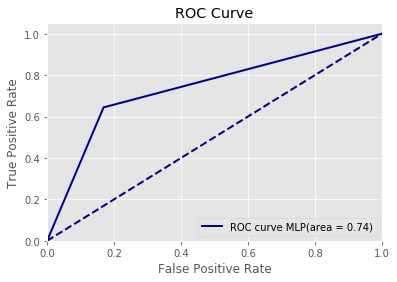

In [53]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fpr, tpr, _ = roc_curve(yntest, clf_predict2)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkblue',
         lw=2, label='ROC curve MLP(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Tecnica de Clasificacion # 4 (Arboles de Decision)

Conjunto de datos 6.496  instancias 21 atributos
train = (clase (1) : 3249, clase (0) : 3247),
test = (clase (0): 1393, clase (1): 1391)


In [54]:
################################################################
#################### ÁRBOL DE DECISIÓN #########################
################################################################
xntrain =df.drop('C', axis = 1)
yntrain = df['C']
xntest =dt.drop('C', axis = 1)
yntest = dt['C']

DT_clf = tree.DecisionTreeClassifier()
DT_clf.fit(xntrain, yntrain)




DT_predict = DT_clf.predict(xntest)

print("\n############## Accuracy DT##################")
print(metrics.accuracy_score(yntest, DT_predict))
print("\n############## Matriz de Confusion DT ##################")
print(metrics.confusion_matrix(yntest, DT_predict))  
print("\n############## Metricas DT ##################")
print(metrics.classification_report(yntest, DT_predict)) 



############## Accuracy DT##################
0.6343390804597702

############## Matriz de Confusion DT ##################
[[860 533]
 [485 906]]

############## Metricas DT ##################
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1393
           1       0.63      0.65      0.64      1391

   micro avg       0.63      0.63      0.63      2784
   macro avg       0.63      0.63      0.63      2784
weighted avg       0.63      0.63      0.63      2784



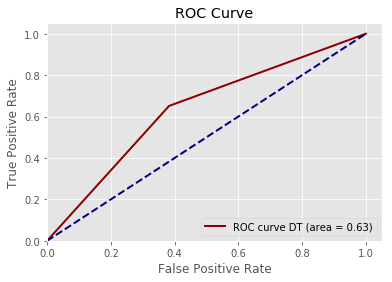

In [55]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fpr, tpr, _ = roc_curve(yntest, DT_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkred',
         lw=2, label='ROC curve DT (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

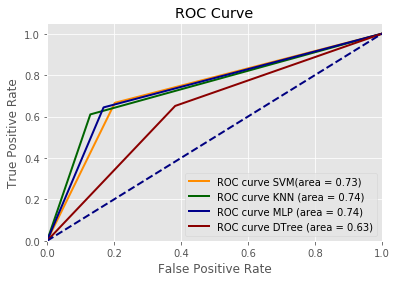

In [56]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fpr, tpr, _ = roc_curve(yntest, SVM_predict)
roc_auc = auc(fpr, tpr)
fpr1, tpr1, _ = roc_curve(yntest, KNN_predict)
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, _ = roc_curve(yntest, clf_predict2)
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, _ = roc_curve(yntest, DT_predict)
roc_auc3 = auc(fpr3, tpr3)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve SVM(area = %0.2f)' % roc_auc)
plt.plot(fpr1, tpr1, color='darkgreen',
         lw=2, label='ROC curve KNN (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='darkblue',
         lw=2, label='ROC curve MLP (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='darkred',
         lw=2, label='ROC curve DTree (area = %0.2f)' % roc_auc3)


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()